# Multiple Linear Regression

y = bo + b1x1 + b2x2 + .... + bn*xn

ASSUMPTIONS OF LINEAR REGRESSION -

1 - Linearity

2- Homoscedasticity

3 - Multivariate Normality

4- Independence of Errors

5- lack of Multicollinearity

# Dummy Variables
In my data (50 Startup) State in categorical form. so i will use dummy variable to convert them into numerical data. as in regression only quantitive data work. if state - California , newyork - I create 2 dummy variable 1 for california and 0 for newyork.

# Dummy variable Trap -
never include all dummy variable in data as it will duplicate the varibale. because D2 = 1- D1 we can not have 3 elements in modle same time -
Bo - The constant

                                             b4 * D1 -  Dummy varibale One

                                             b5 * D2 - Dummy variable Two
Always OMIT one Dummy Variable. If in dataset there is 10 dummy variable then keep only 9.

# P - Value
Small P - value means reject the Null - Hypothesis H0 The p- value is the probability that, If the null hypothesis were true, sampling variation would produce an estimate that is further away from the hypothesised value than our data estimate.

The p- value tells us how likely it is to get a result like this if the Null - Hypothesis is true.

Example -
Ho - The mean of average weight of peanuts in a packet is 70grams.

H1 - The mean of average weight of peanuts in a packet is less than 70 grams.

H1 what we trying to prove ?

Significant Level : ALPHA = 0.05

if P- value is less than alpha value 0.05 REJECT NULL HYPOTHESIS Ho.

# Building a Model
1 - Select required variable for building model not all variable .

WHY -

1 - Garbage In Garbage Out

2- Not easy to explain and very complicated model.

5 Methods of Building a Model
1- All - in

2 - Backward Elimination

3- Forward Selection

4- Bidirectional Elimination

5- Score Comparison

# Feature Selection -
real world data is noisy, and may contain features (variables)
that do not necessarily have good correlation with with the output (predicted/dependent) variable. 
The idea behind ‘Feature selection’ is to study this relation, 
and select only the variables that show a strong correlation.

There are many different kinds of Feature Selections methods —
Forward Selection,
Recursive Feature Elimination,
Bidirectional elimination and
Backward elimination. The simplest and the widely used one is Backward elimination.

# Backward Elimination -
1 - Select a significance (SL) level to stay in the model (eg - Sl = 0.05)

2- fit the full model with all possible predictors

3- Consider the predictor with the highest P- value. if P > Sl, go to step 4, otherwise go to FINISH..

4- Remove the predictor. (that have higher p value)

5- Fit the model without the variable (variable with higher p value)

Rebuild the model as coefficient , constant going be different after removing variable with higher p- value. go back to step 3 once again, again look for the variable wtith highest p- value in new model , if any remove that , fit the model again. Keep doing until all variable that left p - value are less than significant level, Model prepared

# Forward Selection -
1 - select a significant level to enter the model ( eg= Sl = 0.05)

2 - Fit all the simple regression models y ~ xn select the one with the lowest p - value. (take dependent variable and take every single independent variable we have y ~ xn)then select which one have lowest p value for IV.

3- keep this variable and fit all possible models with one extra predictor added to one you already have.

4- consider the predictor with the Lowest P value. if p- value < Sl, go to step 3 otherwise finish.

In [3]:
# I will use feature selection methods — Backward Elimination

In [4]:
import pandas as pd
data = pd.read_csv('50_Startups.csv')
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


Our data has 4 features — ‘R&D Spend’,‘Administration’,‘Marketing Spend’ and ‘State’. Given these, we have to predict the ‘Profit’.

In [7]:
corr = data.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


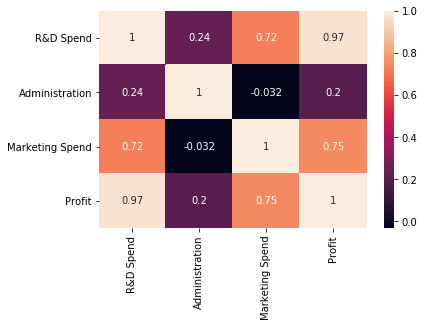

In [9]:
import seaborn as sns
sns.heatmap(corr, annot = True)

Now, we store the dataframe in 2 numpy arrays — X and y:

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Data Preprocessing

To begin with, we One-hot encode ‘State’, as it is a categorical feature.

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
X[:, -1] = labelencoder.fit_transform(X[:, -1])
onehotencoder = OneHotEncoder(categorical_features = [-1])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Now that the categorical variable ‘State’ has been One-Hot encoded, we normalize ‘R&D Spend’,‘Administration’ and ‘Marketing Spend’ with Sklearn’s ‘StandardScaler’ library. But before that, we split the training and testing data. We fit the scaler on training data, and transform the testing data with this scaler.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [14]:
# Now, we perform normalization:

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[:,3:] = scaler.fit_transform(X_train[:,3:])
X_test[:,3:] = scaler.transform(X_test[:,3:])

Now that all our data has been preprocessed, let’s begin with Backward Elimination. Let’s build a simple regression model and check its score. Later we’ll see how we can improve it with Backward Elimination.

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))

0.9347068473282425


The score seems great. Before we begin with Backward elimination, we need to append ‘1’ at the beginning of our data set. Now, why is this important?
The equation of our line (or rather, plane) is y=b+m1.x1+m2.x2+m3.x3+m4.x4.

When we make a linear model with sklearn, the bias term ‘b’ is calculated separately. However, for performing Backward elimination, we are required to use the linear model provided by statsmodels library — which does not consider the bias term. Hence, by adding a dummy feature with value as ‘1’, our equation becomes y=b.x0+m1.x1+m2.x2+m3.x3+m4.x4 where x0 = 1.

In [17]:
import numpy as np
X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

Now that our data has been preprocessed according to statsmodels library, we begin with analysing the ‘P-value’ of each feature once a linear model is built. We keep a track of the required features in a new array — ‘X_opt;

NOTE: Initially, we had 4 features. Now, we have 7 features – 3 numerical, 3 binary (after One-Hot encoding) and a dummy feature with value 1.


In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
X_opt = [0,1,2,3,4,5,6]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           3.91e-21
Time:                        00:41:08   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.202e+04   1185.723     69.170      0.0

OLS stands for ‘Ordinary Least Squares’, which essentially trains a Linear model. From the summary, we observe that the higest P-value is for feature 5, which is way over our significance level of 0.05. Hence, we remove it.

In [21]:
X_opt = [0,1,2,3,4,6]
regressor_OLS = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     165.6
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           3.19e-22
Time:                        00:42:21   Log-Likelihood:                -421.24
No. Observations:                  40   AIC:                             852.5
Df Residuals:                      35   BIC:                             860.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.203e+04   1172.687     69.947      0.0

The highest P-value is for the last feature, which is above our significance level of 0.05. Hence we remove that.

In [22]:
X_opt = [0,1,2,3,4]
regressor_OLS = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     206.1
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           1.02e-22
Time:                        00:42:49   Log-Likelihood:                -423.08
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      36   BIC:                             860.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.211e+04   1209.854     67.870      0.0

Now we see that all features are below our significance level, which means we can no longer eliminate features. The first 3 features x1,x2 and x3 are binary variables for the feature ‘State’ after One-Hot encoding. Hence, we’re essentially left with 2 features — State and R&D Spend. With these features, we’ll now create a Linear Model with Sklearn and test its score:

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X[:,[0,1,2,3]], y, test_size = 0.2, random_state = 0)

In [27]:
scaler = StandardScaler()
X_train[:,3:] = scaler.fit_transform(X_train[:,3:])
X_test[:,3:] = scaler.transform(X_test[:,3:])

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print('Model score: '+str(model.score(X_test,Y_test)))

Model score: 0.9471689304016889


In [30]:
y_pred = model.predict(X_test)